# 데이터 시각화 

### 1. Matplotlib

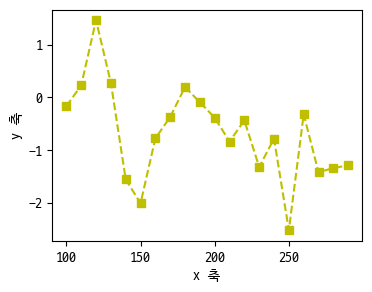

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', family='D2Coding')

x = np.arange(100, 300, 10)
y = np.random.randn(20)

plt.figure(figsize = (4, 3)) # figure 사이즈 지정
plt.xlabel("x 축") # x 라벨 지정
plt.ylabel("y 축") # y 라벨 지정
plt.plot(x, y, color = "y", linestyle = "--", marker = "s") # 그래프 그리기

#### 1) 여러개 그래프 그리기

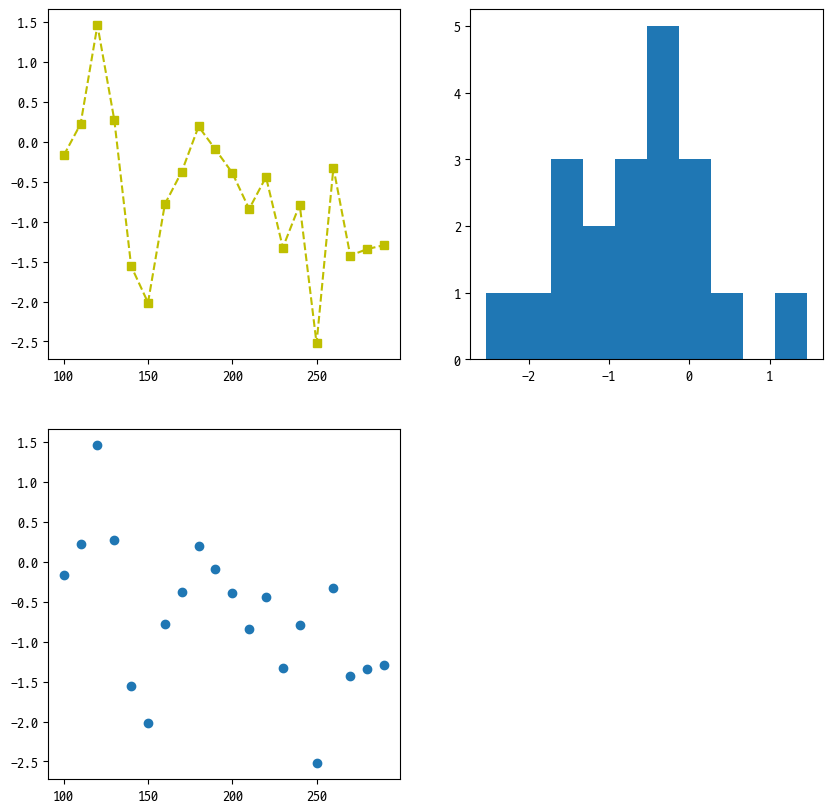

In [27]:
figure = plt.figure(figsize=(10, 10))
axes_1 = figure.add_subplot(2, 2, 1)
axes_2 = figure.add_subplot(2, 2, 2)
axes_3 = figure.add_subplot(2, 2, 3)

axes_1.plot(x, y, color = "y", linestyle = "--", marker = "s") # 그래프 그리기
axes_2.hist(y)
axes_3.scatter(x, y)

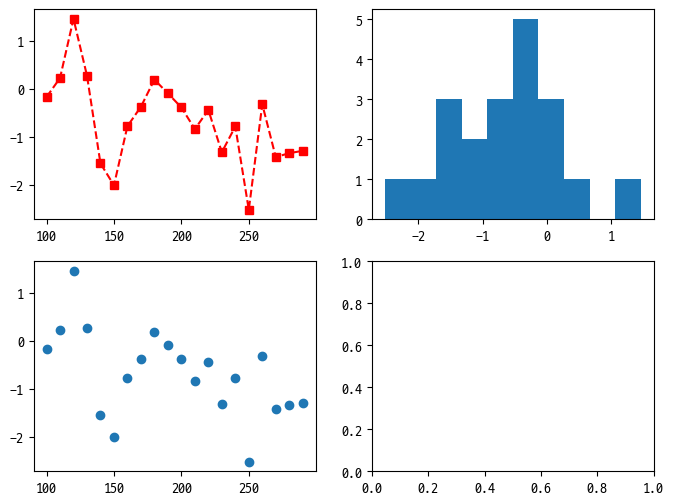

In [32]:
fig , axes = plt.subplots(2, 2, figsize = (8, 6))
axes[0, 0].plot(x, y, "r--s") # 그래프 그리기
axes[0, 1].hist(y)
axes[1, 0].scatter(x, y)

#### 2) 하나의 figure안에 두 개의 그래프 그리기

ValueError: x and y must have same first dimension, but have shapes (0,) and (11,)

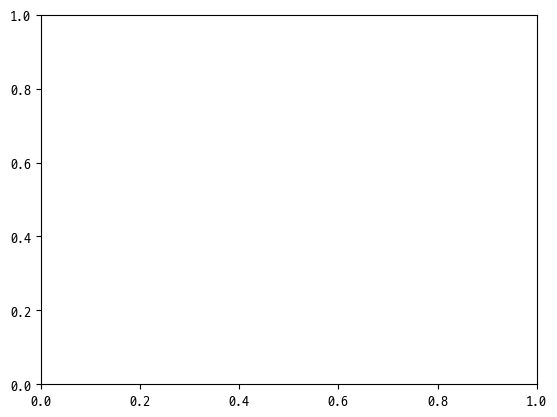

In [41]:
x1 = np.arange(100, 100, 10)
y1 = np.random.randn(10)

x2 = np.arange(100, 100, 10)
y2 = np.random.randn(10)

plt.plot(x1, y1, label = "x1")
plt.plot(x2, y2, label = "x2")

plt.legend(loc = 1) # 범례 위치

plt.scatter()

#### 3) 여러 그래프의 label, title 다루기

In [142]:
#패키지를 불러옵니다.
import matplotlib as mpl
import platform

#주피터 노트북내에 그림을 표시 합니다.
%matplotlib inline

my_platform = platform.system()
# 폰트 설정
if my_platform == 'Linux':
  mpl.rc('font', family='NanumBarunGothic')
elif my_platform == 'Windows':
  mpl.rc('font', family='Malgun Gothic')
elif my_platform == 'Darwin':
  mpl.rc('font', family='AppleGothic')

# 그래프 음수값 깨짐 방지
mpl.rc('axes', unicode_minus=False)

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/%40preprocessing_data_member01.csv', index_col = 0)
df.columns

Index(['ID', '총구매수량_x', '기타품목구매비율', '수저류구매비율', '실링구매비율', '용기류구매비율', '위생용품구매비율',
       '총구매횟수', '총판매액', '총할인금액', '총순수이익', '나이', '사용가능 적립금', '성별', '최종접속일',
       '최종주문일', '유입경로', '유입기기', '회원 가입일', '사업자구분', '회원구분', '지역', '세부지역', '주소',
       '최종주문일(clean)', '최종주문연도', '최종주문월', '최종주문일자', '최종주문요일', '최종주문시간',
       '회원가입일(clean)', '가입연도', '가입월', '가입일자', '가입요일'],
      dtype='object')

In [128]:
# 1
import plotly.express as px
df_count = df[["최종주문요일", "ID"]].groupby("최종주문요일").count()
df_count.reset_index(inplace=True)
df_count.rename(columns={"ID": "count", "최종주문요일": "last_day"}, inplace=True)
df_count.sort_values("count", ascending=False, inplace=True)

data_canada = px.data.gapminder().query("country == 'Canada'")
data_canada.head()
fig = px.bar(df_count, x='last_day', y='count')
fig.show()

In [129]:
# 2

df_2 = df[["성별", "최종주문요일", "ID"]].groupby(["성별", "최종주문요일"]).count().rename(columns={"ID": "count"}).reset_index()

data_canada = px.data.gapminder().query("country == 'Canada'")
data_canada.head()
fig = px.bar(df_2, x='최종주문요일', y='count', color='성별', barmode="group")
fig.show()

In [143]:
df_convert_date = df["최종주문일(clean)"].apply(lambda x: pd.to_datetime(x).strftime("%Y-%m"))
df_concat = pd.concat([df_convert_date, df[["가입월", "ID"]]], axis = "columns")
df_join_count = df_concat.groupby(["가입월", "최종주문일(clean)"]).count()
df_rename = df_join_count.rename(columns={"최종주문일(clean)": "month_count", "ID": "count"})
df_final = df_rename.reset_index()
# df_join_count.reset_index()
df = px.data.iris() # iris is a pandas DataFrame
fig = px.scatter(df_final, x="가입월", y="count")
fig.show()


In [146]:
import pandas as pd
df_shop = pd.read_csv("shopping_mall.csv", index_col = 0)

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,T0000000207,S005,1,2019-02-04 00:42:48,TS558026,김민겸,2019-01-29 0:23,fukuzawa_hiromasa@example.com,M,69,1950-01-18,인천광역시,PC-E,210000
96,96,T0000000208,S003,1,2019-02-04 00:53:35,AS359364,김현도,2019-01-28 7:06,ooba_chise@example.com,F,64,1955-04-25,울산광역시,PC-C,120000
97,97,T0000000208,S001,1,2019-02-04 00:53:35,AS359364,김현도,2019-01-28 7:06,ooba_chise@example.com,F,64,1955-04-25,울산광역시,PC-A,50000
98,98,T0000000209,S002,2,2019-02-04 01:00:19,TS515806,김윤기,2019-02-02 20:43,ichikawa_kazuyuki@example.com,M,30,1989-07-12,대전광역시,PC-B,85000


In [149]:
df_shop["total_price"] = df_shop["item_price"] * df_shop["quantity"]
df_shop[["pref", "total_price"]].groupby("pref").sum()

import plotly.express as px

px.bar(df_shop, x="pref", y="total_price", color="pref")

In [151]:
fig = px.pie(df_shop, values='total_price', names='pref', title='지역별 총 매출')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [152]:
df_shop[["gender", "age", "quantity", "item_name"]]

,gender,age,quantity,item_name
0,M,30,1,PC-E
1,M,73,1,PC-A
2,M,42,1,PC-C
3,F,47,1,PC-E
4,M,74,2,PC-B
...,...,...,...,...
7139,M,64,1,PC-D
7140,F,74,1,PC-B
7141,F,40,2,PC-A
7142,M,56,1,PC-B


In [9]:
import pandas as pd
df_shop = pd.read_csv("shopping_mall.csv", index_col = 0)
print(df_shop.columns)
print(df_shop.head())

Index(['detail_id', 'transaction_id', 'item_id', 'quantity', 'payment_date',
       'customer_id', 'customer_name', 'registration_date', 'email', 'gender',
       'age', 'birth', 'pref', 'item_name', 'item_price'],
      dtype='object')
   detail_id transaction_id item_id  quantity         payment_date  \
0          0    T0000000113    S005         1  2019-02-01 01:36:57   
1          1    T0000000114    S001         1  2019-02-01 01:37:23   
2          2    T0000000115    S003         1  2019-02-01 02:34:19   
3          3    T0000000116    S005         1  2019-02-01 02:47:23   
4          4    T0000000117    S002         2  2019-02-01 04:33:46   

  customer_id customer_name registration_date                        email  \
0    PL563502           김태경  2019-01-07 14:34  imoto_yoshimasa@example.com   
1    HD678019           김영웅  2019-01-27 18:00   mifune_rokurou@example.com   
2    HD298120           김강현   2019-01-11 8:16     yamane_kogan@example.com   
3    IK452215           김주한   

In [37]:
# 1
# 나이대 별로 가장 많이 구매한 상품

import plotly.express as px

df_shop[["age", "item_name"]]
df_age = df_shop["age"].apply(lambda x: f"{int(x/10)}0대")
df_concat = pd.concat([df_age, df_shop["item_name"]], axis = "columns")
df_age_item_count = df_concat.value_counts(["age", "item_name"]).reset_index().sort_values(["age", "item_name"])

fig = px.bar(df_age_item_count, x="age", y="count", barmode="group", color="item_name", title="나이별 상품 선호도", labels={"age": "나이대", "count": "상품 구매 수"})
fig.show()


0       30대
1       70대
2       40대
3       40대
4       70대
       ... 
7139    60대
7140    70대
7141    40대
7142    50대
7143    70대
Name: age, Length: 7144, dtype: object

In [34]:
# 2
df_region_gender = df_shop[["pref", "gender"]]
df_region_gender["total_price"] = df_shop["quantity"] * df_shop["item_price"]
df_region_gender

/var/folders/mw/k_rydbt555l0d4t5g9pbrzrw0000gn/T/ipykernel_7623/1698788257.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [4]:
# 3

In [5]:
# 4

In [6]:
# 5

In [ ]:
# 6